In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist_train=pd.read_csv("mnist_train.csv", header=None)
mnist_test=pd.read_csv("mnist_test.csv", header=None)

In [8]:
mnist_train.shape

(60000, 785)

In [9]:
mnist_test.shape

(10000, 785)

In [5]:
cols=["label"]
# for i in range (784)
#cols.append(f"px_{1+1}) python=3.6
for i in range (784):
    cols.append("px_"+str(i+1))

In [6]:
#cols

In [10]:
mnist_train.columns=cols
mnist_test.columns=cols

In [11]:
mnist_train.head(7)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
mnist_test.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
image_size=28 # размерность картинки

In [14]:
train_label=mnist_train["label"].values

In [15]:
type(train_label)

numpy.ndarray

In [ ]:
train_label.shape

In [17]:
test_label=mnist_test["label"].values
type(test_label)

numpy.ndarray

In [18]:
test_label.shape

(10000,)

In [22]:
matrix=np.array([
    [1,2,3],
    [4,5,6]
])

In [23]:
print(matrix)

[[1 2 3]
 [4 5 6]]


In [25]:
matrix[:,1:] # индексация в питоне с 0

array([[2, 3],
       [5, 6]])

In [27]:
train_image=mnist_train.values[:,1:]

In [28]:
train_image.shape

(60000, 784)

In [29]:
test_image=mnist_test.values[:,1:]

In [30]:
test_image.shape

(10000, 784)

In [31]:
image_size*image_size

784

In [32]:
train_image=train_image.reshape(60000,28, 28)

In [33]:
train_image.shape

(60000, 28, 28)

In [35]:
test_image=test_image.reshape(10000, 28, 28)

In [36]:
test_image.shape

(10000, 28, 28)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_classifier=KNeighborsClassifier(n_jobs=-1)

In [ ]:
# fit/predict

In [43]:
train_image.shape

(60000, 28, 28)

In [42]:
knn_classifier=knn_classifier.fit(train_image, train_label)
#не будет работать, 

ValueError: Found array with dim 3. Estimator expected <= 2.

In [44]:
train_image.shape

(60000, 28, 28)

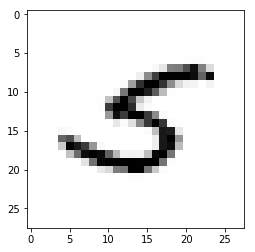

In [48]:
plt.imshow(train_image[437, :, :], cmap="Greys")

In [49]:
knn_classifier=knn_classifier.fit(train_image.reshape(60000, 784), train_label)

In [67]:
image_id=461

In [68]:
prediction=knn_classifier.predict(test_image[image_id].reshape(1,784))
print(prediction)

[6]


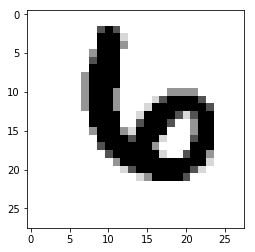

In [69]:
plt.imshow(test_image[image_id], cmap="Greys")

In [ ]:
# метрики оценивают вероятность шибки , переводя ее в математику(графики...)


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix #accuracy_score(y_true, y_pred, normalize=False)
accuracy_score?

In [78]:
#knn_classifier.predict
all_predictions=knn_classifier.predict(test_image.reshape(10000, 784))
accuracy_score(test_label,all_predictions)*100

96.88

In [79]:
cm=confusion_matrix(test_label, all_predictions)
print(cm)

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


Prediction: 0


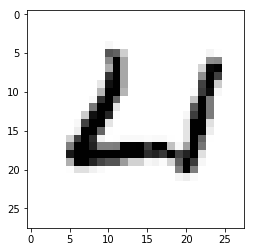

Prediction: 9


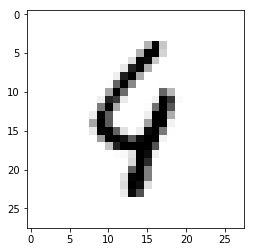

Prediction: 6


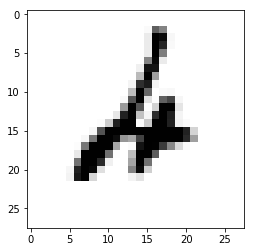

Prediction: 1


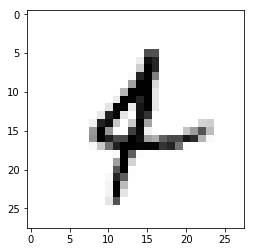

Prediction: 9


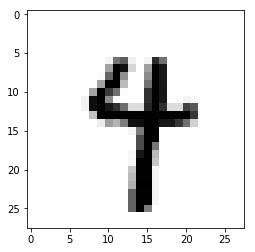

Prediction: 9


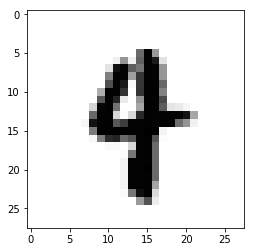

Prediction: 9


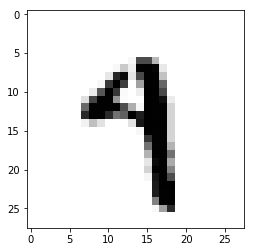

Prediction: 9


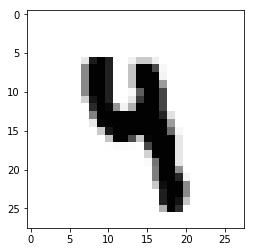

Prediction: 6


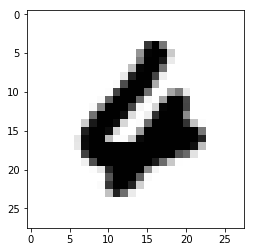

Prediction: 9


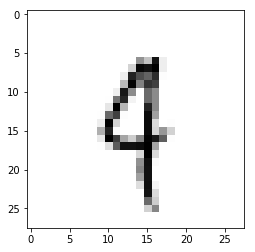

Prediction: 1


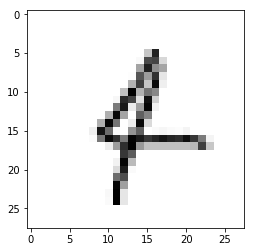

Prediction: 9


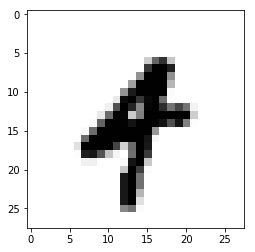

Prediction: 8


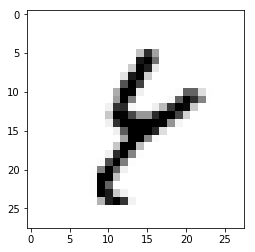

Prediction: 9


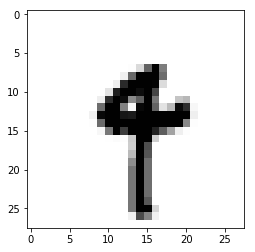

Prediction: 9


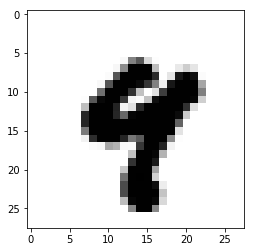

Prediction: 1


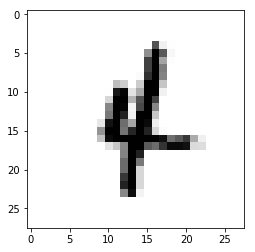

Prediction: 9


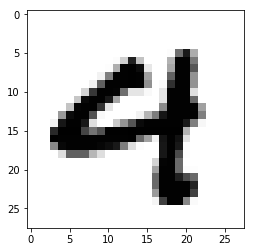

Prediction: 9


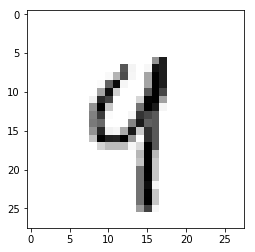

Prediction: 9


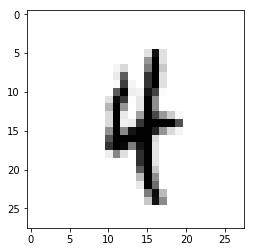

Prediction: 9


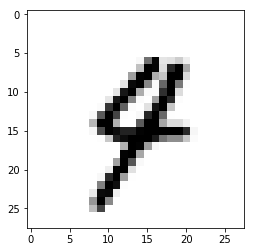

Prediction: 6


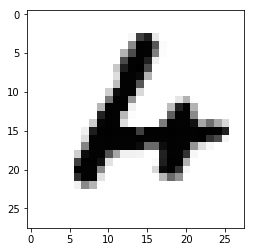

Prediction: 6


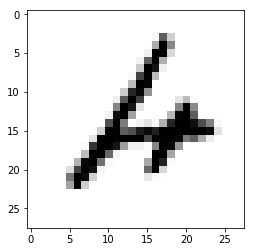

Prediction: 9


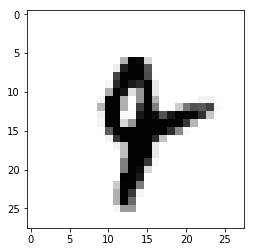

Prediction: 9


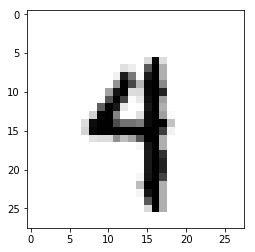

Prediction: 9


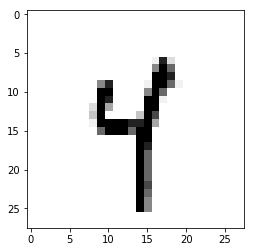

Prediction: 9


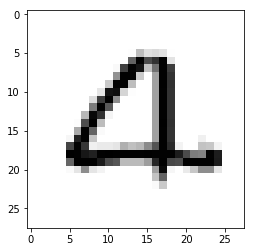

Prediction: 9


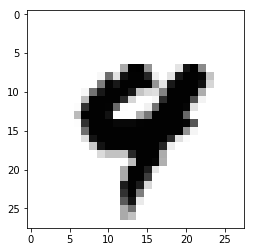

Prediction: 1


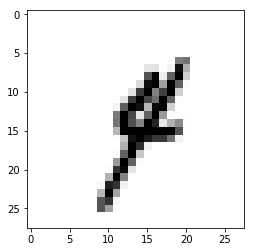

Prediction: 7


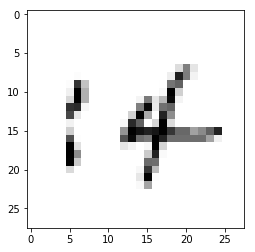

Prediction: 1


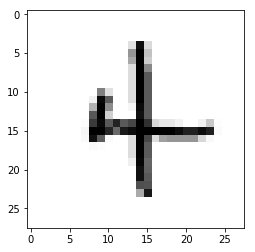

Prediction: 0


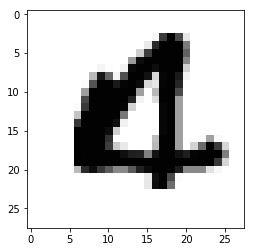

Prediction: 9


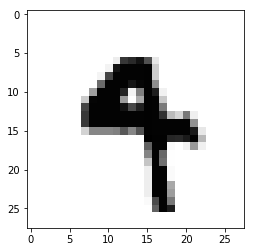

Prediction: 7


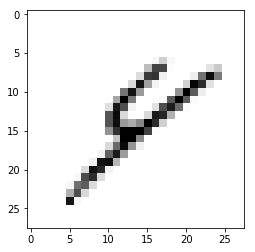

Prediction: 1


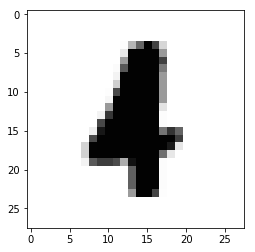

Prediction: 1


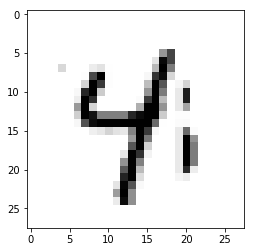

Prediction: 9


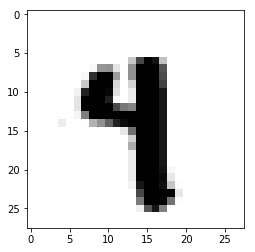

Prediction: 9


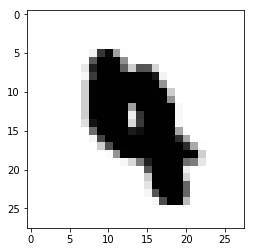

Prediction: 0


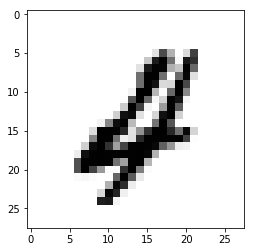

In [81]:
for i, (real, pred) in enumerate (zip(test_label, all_predictions)):
    if real==4 and real != pred:
        print("Prediction: " + str(pred))
        plt.imshow(test_image[i], cmap="Greys")
        plt.show()

In [ ]:
# list(zip([1, 2, 3],["I", "II", "III"])) склеивает два массива
#list(enumumerate(["a", "b", "c"])) нумерует перменные

In [85]:
list(zip([1, 2, 3],["I", "II", "III"]))

[(1, 'I'), (2, 'II'), (3, 'III')]

In [86]:
list(enumerate(["a", "b", "c"]))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [ ]:
#домашнее задание попробовать другой алгоритм и повариъьировать количество соседой

In [ ]:
# работа нейросети
# bias,    x1, x2, x3, ..., xn <- n= 784
#a0,    a1, a2, a3, ..., an < n= 784
#X = a1 * x1 + a2*x2+ ... + an*xn + a0 * bias <- число
# f(X) -> Y

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
nn_classifier = MLPClassifier(verbose=True)

In [89]:
nn_classifier.fit?

In [90]:
nn_classifier=nn_classifier.fit(train_image.reshape(60000, 784), train_label)

Iteration 1, loss = 2.51873983
Iteration 2, loss = 0.65220427
Iteration 3, loss = 0.40790947
Iteration 4, loss = 0.30159134
Iteration 5, loss = 0.24300400
Iteration 6, loss = 0.20230422
Iteration 7, loss = 0.17766712
Iteration 8, loss = 0.15843523
Iteration 9, loss = 0.14044654
Iteration 10, loss = 0.13278252
Iteration 11, loss = 0.12624048
Iteration 12, loss = 0.11939195
Iteration 13, loss = 0.11442608
Iteration 14, loss = 0.11407233
Iteration 15, loss = 0.10697512
Iteration 16, loss = 0.10410921
Iteration 17, loss = 0.09292223
Iteration 18, loss = 0.09498142
Iteration 19, loss = 0.08864755
Iteration 20, loss = 0.09142174
Iteration 21, loss = 0.08885473
Iteration 22, loss = 0.08003910
Iteration 23, loss = 0.08408734
Iteration 24, loss = 0.08398531
Iteration 25, loss = 0.07203234
Iteration 26, loss = 0.06677486
Iteration 27, loss = 0.08397140
Iteration 28, loss = 0.07424303
Iteration 29, loss = 0.07243812
Iteration 30, loss = 0.07263684
Iteration 31, loss = 0.06396228
Iteration 32, los

In [91]:
 image_id= 742

In [92]:
prediction=nn_classifier.predict(test_image[image_id].reshape(1,784))
print(prediction)

[0]


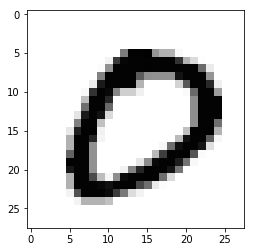

In [93]:
plt.imshow(test_image[image_id], cmap= "Greys")

In [95]:
all_predictions=nn_classifier.predict(test_image.reshape(10000, 784))
accuracy_score(test_label,all_predictions)*100

96.48

In [96]:
cm=confusion_matrix(test_label, all_predictions)
print(cm)

[[ 966    0    5    2    0    1    1    4    1    0]
 [   0 1121    4    1    0    4    1    0    4    0]
 [   6    4 1001    9    0    1    2    6    3    0]
 [   3    2   12  970    2    8    0    5    5    3]
 [   3    1    6    0  941    0   10    4    0   17]
 [   3    0    1   11    2  847   10    3   11    4]
 [   5    3    3    0    1    4  940    0    2    0]
 [   2    2   12    5    5    0    0  991    2    9]
 [   9    2   11   10    3    5    7    5  916    6]
 [   1    6    1   10   17    7    0    6    6  955]]


Prediction: 6


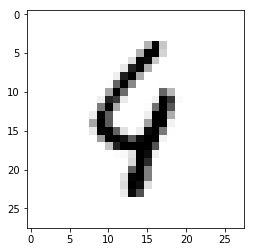

Prediction: 2


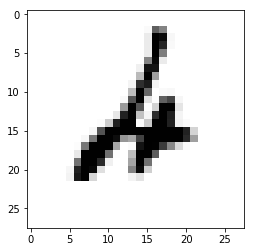

Prediction: 6


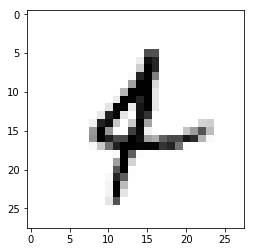

Prediction: 9


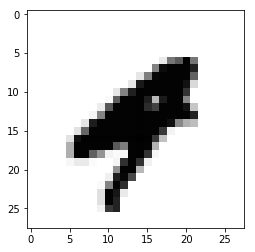

Prediction: 9


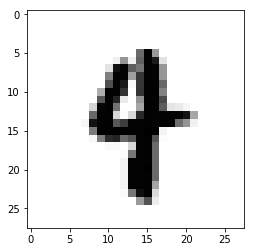

Prediction: 6


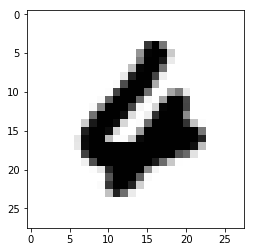

Prediction: 9


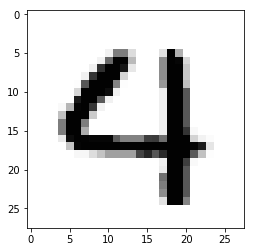

Prediction: 6


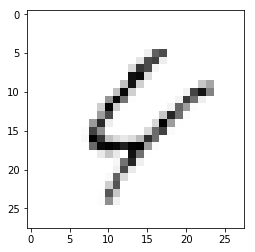

Prediction: 6


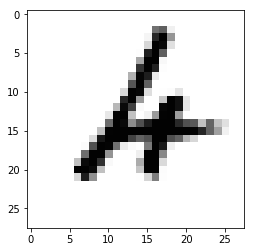

Prediction: 9


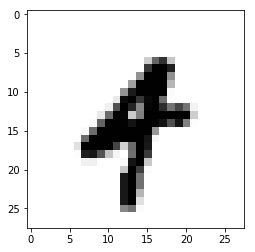

Prediction: 6


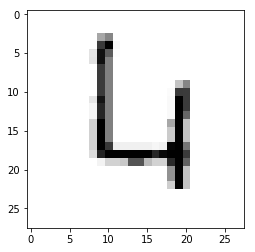

Prediction: 9


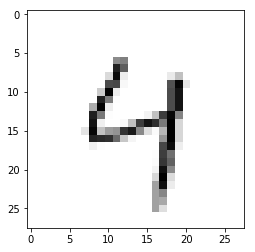

Prediction: 9


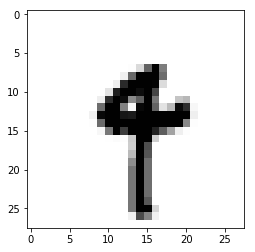

Prediction: 9


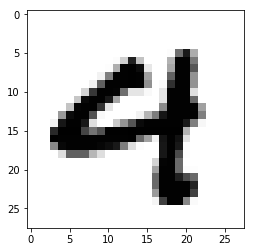

Prediction: 9


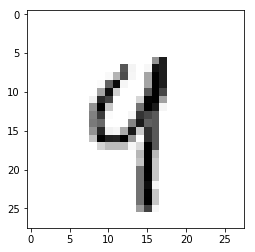

Prediction: 9


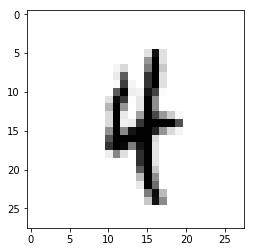

Prediction: 9


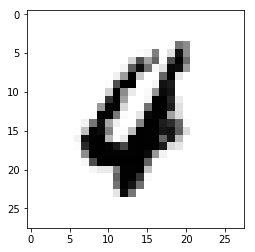

Prediction: 9


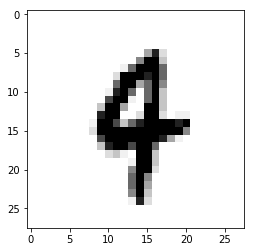

Prediction: 9


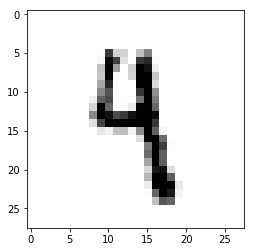

Prediction: 9


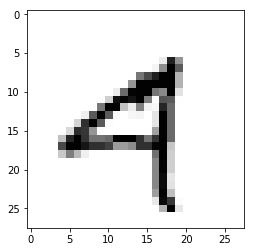

Prediction: 9


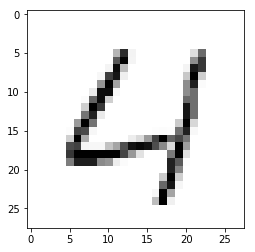

Prediction: 6


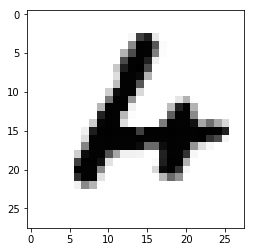

Prediction: 6


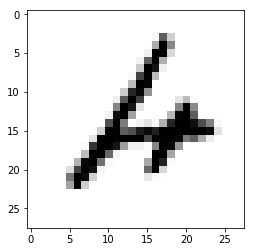

Prediction: 6


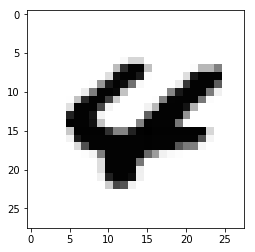

Prediction: 2


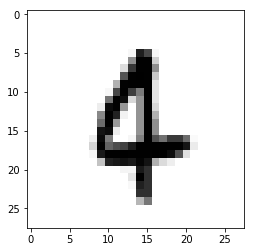

Prediction: 9


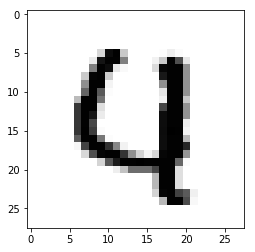

Prediction: 7


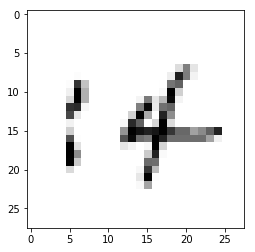

Prediction: 0


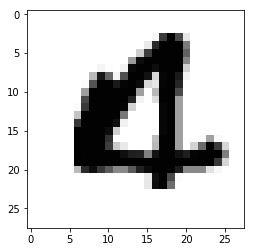

Prediction: 9


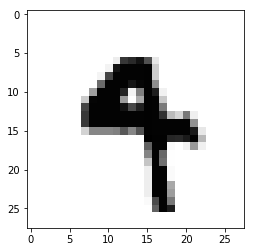

Prediction: 6


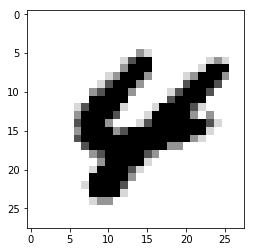

Prediction: 0


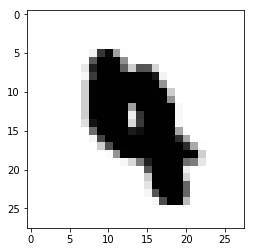

Prediction: 0


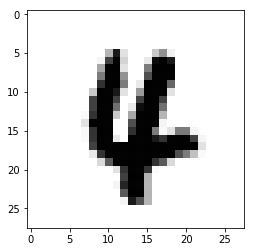

Prediction: 7


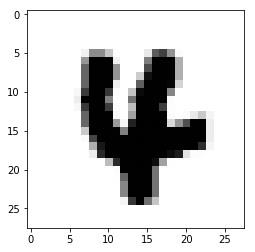

Prediction: 7


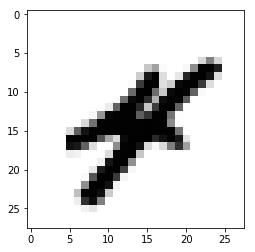

Prediction: 9


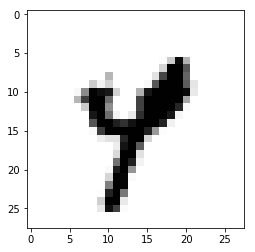

Prediction: 7


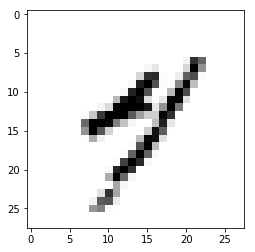

Prediction: 2


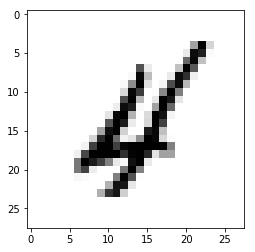

Prediction: 2


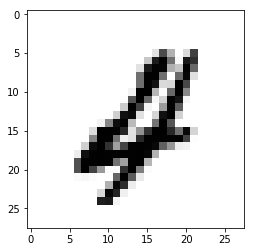

Prediction: 2


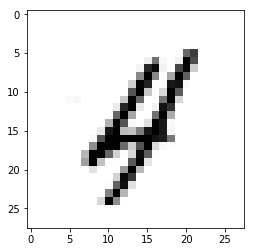

Prediction: 2


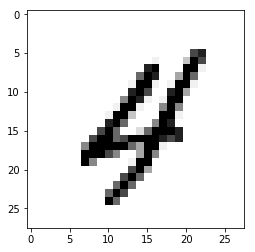

Prediction: 1


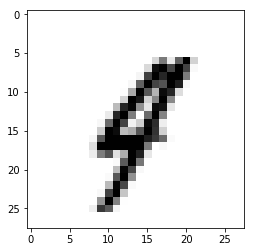

In [97]:
for i, (real, pred) in enumerate (zip(test_label, all_predictions)):
    if real==4 and real != pred:
        print("Prediction: " + str(pred))
        plt.imshow(test_image[i], cmap="Greys")
        plt.show()